# Seaborn: catplot

In [ ]:
import seaborn as sns

In [ ]:
#load car data and drop rows with missings
cars = sns.load_dataset('mpg').dropna()

#filter to 4-, 6-, 8-cylinder cars
cars = cars[cars.cylinders.isin([4, 6, 8])] 

#add old/new column
cars['type'] = ['old' if x <=76 else 'new' for x in cars.model_year]

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,old
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,old
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,old
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,old
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,old


In [4]:
cars.shape

(385, 10)

## Intro Visuals

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
sns.set(style='darkgrid', font_scale=1.5)  

g = sns.catplot(x='cylinders', y='horsepower', 
                data=cars,
                row='origin',
                kind='box',
                aspect=1.5,
                height=4
               )
g.set_titles(row_template="{row_name} cars");

### Thumbnail

In [ ]:
sns.set(style='white', font_scale=1.5)  

g = sns.catplot(x='cylinders', y='mpg', 
                data=cars,
                col='type',
                kind='violin',
                aspect=1.7,
                height=4,
                facet_kws={'ylim':(0, 50)},
                palette=['lightgray', '#B58389', '#7C2021']
               )
g.set_titles(col_template="{col_name} cars")
plt.tight_layout();

In [ ]:

sns.set(style='white', font_scale=1.5)  

g = sns.catplot(x='horsepower', y=['']*len(cars),
                hue='cylinders',
                data=cars,
                kind='strip',
                aspect=4.8,
                height=3,
                s=10,
                legend=False,
                palette=['lightgray', '#B58389', '#7C2021'],
               )
g.set_titles(col_template="{col_name} cars")
plt.tight_layout();

## Basics

In [5]:
sns.set_style('white')

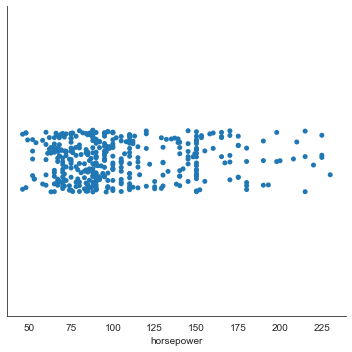

In [7]:
sns.catplot(x='horsepower', data=cars);
# By default, catplot will plot a strip plot for each unique value in the column.

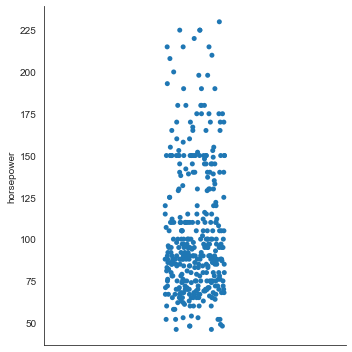

In [8]:
sns.catplot(y='horsepower', data=cars);

### Kind

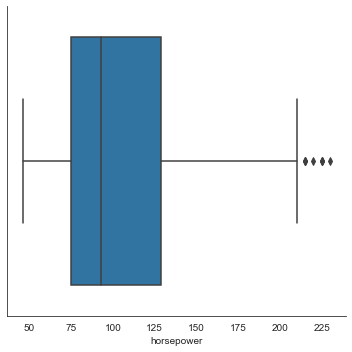

In [9]:
sns.catplot(x='horsepower', data=cars, kind='box');

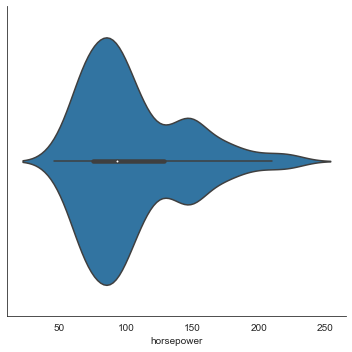

In [10]:
sns.catplot(x='horsepower', data=cars, kind='violin');

### Categorical Variables, Hue

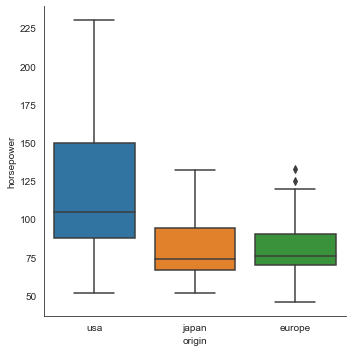

In [11]:
sns.catplot(x='origin', y='horsepower', 
            data=cars, 
            kind='box');

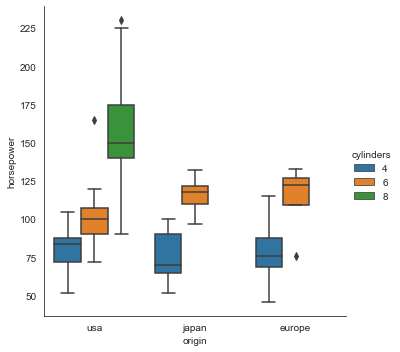

In [12]:
sns.catplot(x='origin', y='horsepower', 
            data=cars, 
            hue='cylinders',
            kind='box');

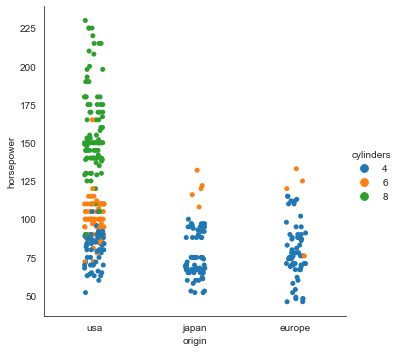

In [13]:
sns.catplot(x='origin', y='horsepower',
            data=cars, 
            hue='cylinders',
            kind='strip'); 

## Small Multiples (FacetGrid)

In [14]:
sns.set_style('darkgrid')

#### `row`, `col`

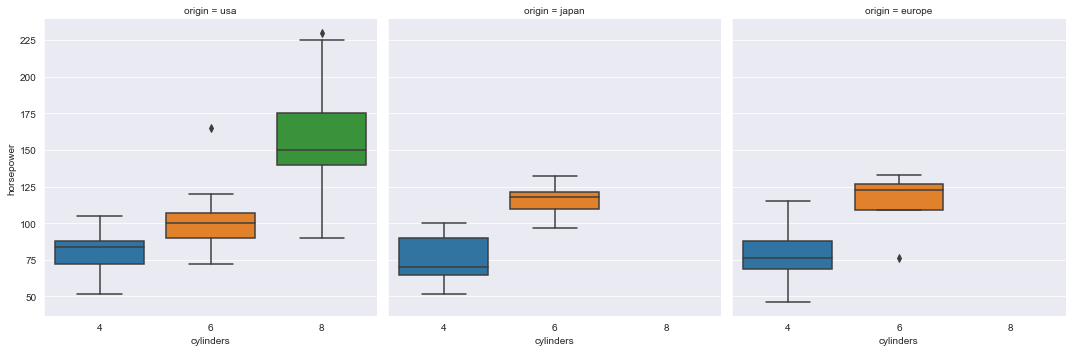

In [15]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='box',
            col='origin'
           );

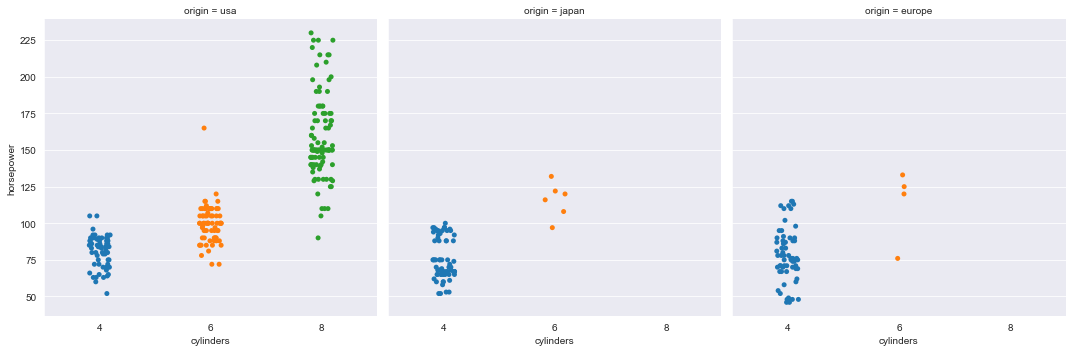

In [16]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin'
           );

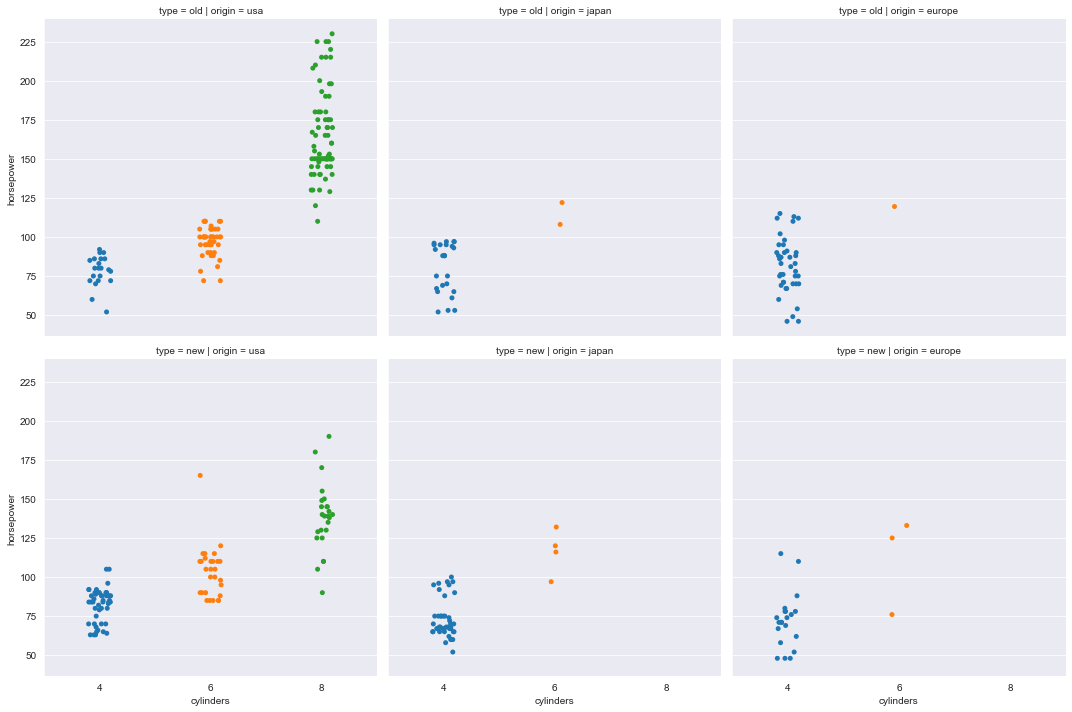

In [17]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin',
            row='type'
           );

#### `row_order` (`order`, `hue_order`, `col_order`)

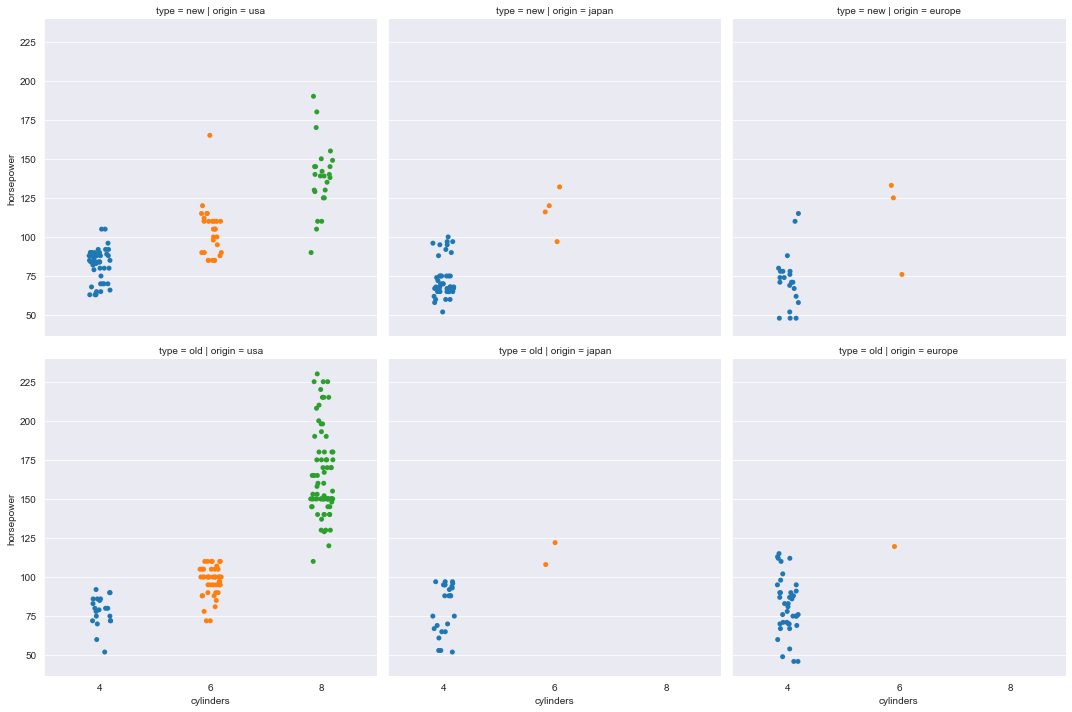

In [18]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin',
            row='type',
            row_order=['new', 'old']
           );

## Styling

In general, additional keyword arguments will be passed to the kind of plot selected.  

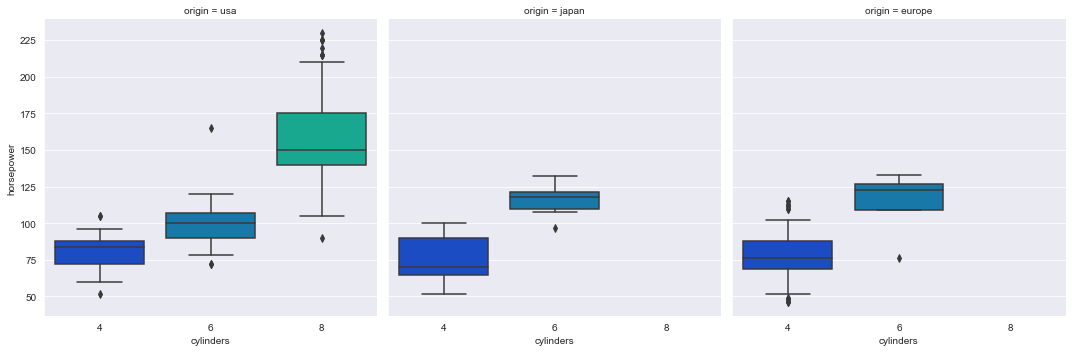

In [19]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='box',
            col='origin',
            palette='winter', 
            whis=1
           );

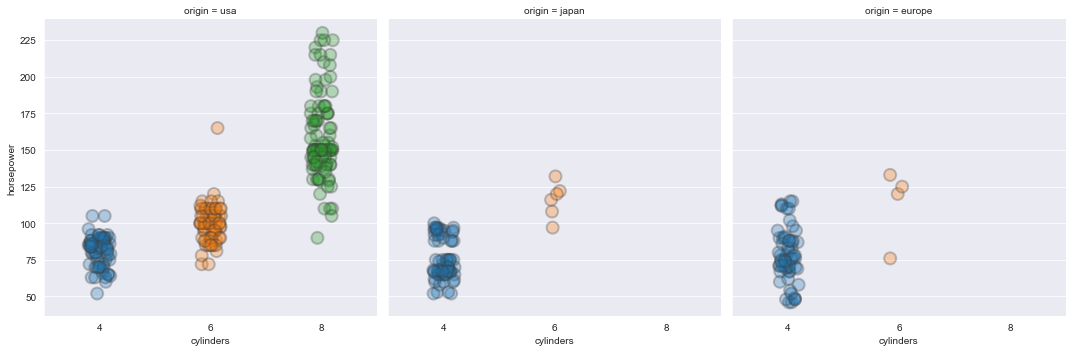

In [20]:
sns.catplot(x='cylinders', y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin',
            s=12,
            alpha=0.3,
            linewidth=2
           );

### FacetGrid Styling

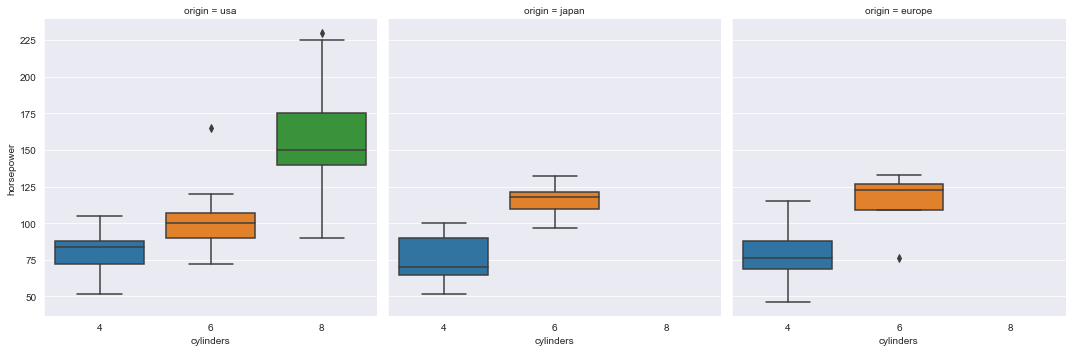

In [21]:
g = sns.catplot(x='cylinders', y='horsepower', 
                data=cars,
                col='origin',
                kind='box'
               );

In [22]:
type(g)

seaborn.axisgrid.FacetGrid

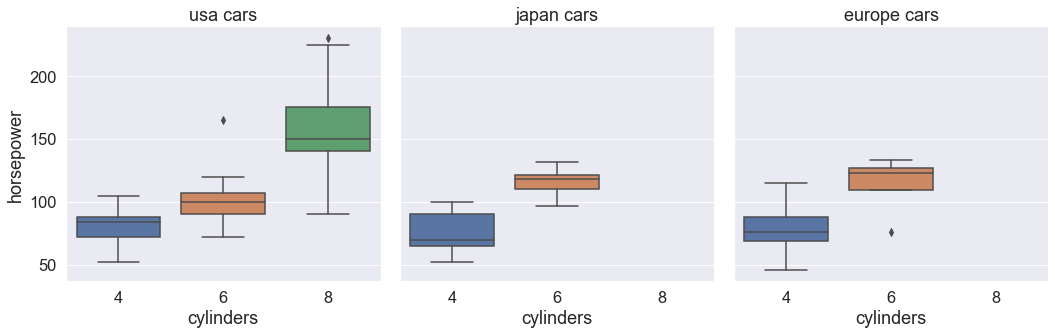

In [23]:
sns.set(style='darkgrid', font_scale=1.5)  

g = sns.catplot(x='cylinders', y='horsepower', 
                data=cars,
                col='origin',
                kind='box'
               )
g.set_titles(col_template="{col_name} cars");

In [24]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
df.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

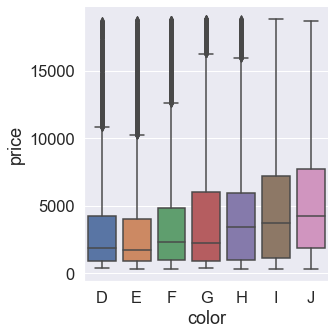

In [36]:
sns.catplot(x='color', y='price',data=df, kind='box',whis=2);

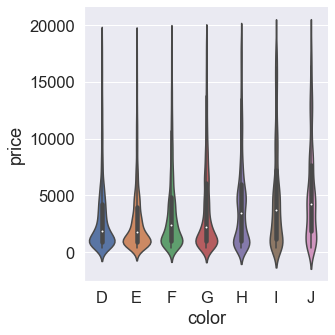

In [38]:
sns.catplot(x='color', y='price',data=df, kind='violin');

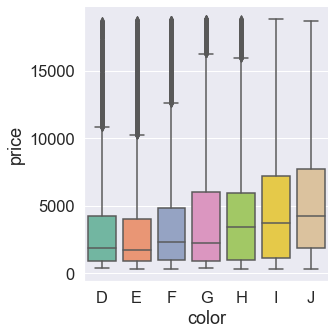

In [41]:
sns.catplot(x='color', y='price',data=df, kind='box',whis=2, palette='Set2');

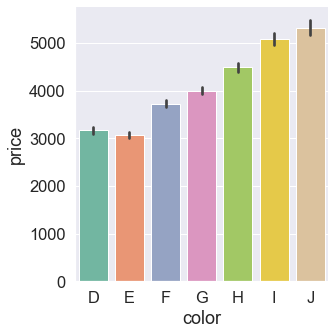

In [42]:
sns.catplot(x='color', y='price',data=df, kind='bar', palette='Set2');

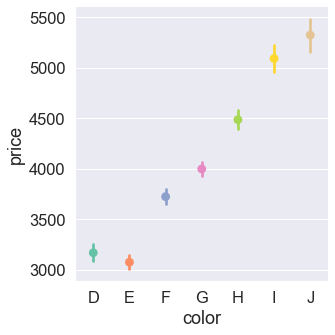

In [45]:
sns.catplot(x='color', y='price',data=df, kind='point', palette='Set2');